In [106]:
#import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats


In [107]:
#read cancellations scotland dataset

data = pd.read_csv('cancellations_scotland_january_2024.csv')
print(data.shape)
data.head()

(105, 14)


,Month,Country,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S92000003,28810,NaN,2695,NaN,1057,NaN,853,NaN,523,NaN,262,NaN
1,201506,S92000003,30941,NaN,2800,NaN,1194,NaN,870,NaN,449,NaN,287,NaN
2,201507,S92000003,27725,NaN,2642,NaN,1083,NaN,854,NaN,457,NaN,248,NaN
3,201508,S92000003,28948,NaN,2630,NaN,1080,NaN,912,NaN,491,NaN,147,NaN
4,201509,S92000003,30938,NaN,2829,NaN,1122,NaN,1000,NaN,535,NaN,172,NaN


In [108]:

#read cancellations by board dataset

data_board = pd.read_csv('cancellations_by_board_january_2024.csv')
data_board = data_board.rename(columns={'HBT': 'HB'})
print(data_board.shape)
data_board.head()



(1575, 14)


,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN


In [109]:
#read board information dataset

hb = pd.read_csv('hb14_hb19.csv')
hb.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.00,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003


In [110]:
#merge the datasets

data_board = data_board.merge(hb[['HB', 'HBName']], on='HB', how='left')
data_board.head()



,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,HBName
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,NHS Ayrshire and Arran
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,NHS Borders
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,NHS Dumfries and Galloway
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,NHS Forth Valley
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,NHS Grampian


In [111]:
#drop empty columns (QF columns)

data = data.dropna(axis=1, how='all')
data_board = data_board.dropna(axis=1, how='all')


In [112]:
#print columns
print(data.columns)
print(data_board.columns)


Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason'],
      dtype='object')
Index(['Month', 'HB', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'HBName'],
      dtype='object')


In [113]:
#check for missing values and duplicates
print(data.isnull().sum())
print("-------------------")
print(data_board.isnull().sum())


Month                        0
Country                      0
TotalOperations              0
TotalCancelled               0
CancelledByPatientReason     0
ClinicalReason               0
NonClinicalCapacityReason    0
OtherReason                  0
dtype: int64
-------------------
Month                          0
HB                             1
TotalOperations                0
TotalCancelled                 0
CancelledByPatientReason       0
ClinicalReason                 0
NonClinicalCapacityReason      0
OtherReason                    0
HBName                       105
dtype: int64


In [114]:


hb_set = set(hb['HB'].values)
data_board_set = set(data_board['HB'].values)


# Elements in data_board_set but not in hb_set
difference_data_board_hb = data_board_set - hb_set
print("Elements in data_board but not in hb: ", difference_data_board_hb)


Elements in data_board but not in hb:  {'SB0801', nan}


In [115]:
#drop row with null

print(data_board.shape)

data_board = data_board.dropna(subset=['HB'])

#drop row with lone hospital SB0801
data_board = data_board[data_board.HB != 'SB0801']

print(data_board.shape)




(1575, 9)
(1470, 9)


In [116]:
#check for duplicates

print(data_board.duplicated().sum())

0


In [117]:
print(data_board.isnull().sum())
print(data.columns)


#set date as index
data['date'] = pd.to_datetime(data['Month'], format='%Y%m')
data.set_index('date', inplace=True)

Month                        0
HB                           0
TotalOperations              0
TotalCancelled               0
CancelledByPatientReason     0
ClinicalReason               0
NonClinicalCapacityReason    0
OtherReason                  0
HBName                       0
dtype: int64
Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason'],
      dtype='object')


In [118]:
#Descrptive statsitcs

print(data.describe())

          Month  TotalOperations  TotalCancelled  CancelledByPatientReason  \
count    105.00           105.00          105.00                    105.00   
mean  201926.60         24465.83         2221.63                    802.70   
std      254.77          6122.56          674.54                    291.85   
min   201505.00          3406.00          311.00                     82.00   
25%   201707.00         20587.00         1854.00                    655.00   
50%   201909.00         26018.00         2348.00                    874.00   
75%   202111.00         29271.00         2706.00                   1013.00   
max   202401.00         32113.00         3646.00                   1310.00   

       ClinicalReason  NonClinicalCapacityReason  OtherReason  
count          105.00                     105.00       105.00  
mean           782.78                     533.57       102.54  
std            206.30                     199.99        56.36  
min            161.00                    

In [119]:
#create totals by board

totals_by_board = data_board.groupby('HBName')[['TotalCancelled', 'TotalOperations', 'CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']].sum().reset_index()

#calculate cancellation rates

totals_by_board['CancellationRate'] = totals_by_board['TotalCancelled'] / totals_by_board['TotalOperations']
totals_by_board['CancellationRate'] = totals_by_board['CancellationRate'] * 100

totals_by_board['PatientCancellationRate'] = totals_by_board['CancelledByPatientReason'] / totals_by_board['TotalCancelled']
totals_by_board['PatientCancellationRate'] = totals_by_board['PatientCancellationRate'] * 100

totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalReason'] / totals_by_board['TotalCancelled']
totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalCancellationRate'] * 100

totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCapacityReason'] / totals_by_board['TotalCancelled']
totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCancellationRate'] * 100

totals_by_board['OtherCancellationRate'] = totals_by_board['OtherReason'] / totals_by_board['TotalCancelled']
totals_by_board['OtherCancellationRate'] = totals_by_board['OtherCancellationRate'] * 100

totals_by_board = totals_by_board.sort_values(by='CancellationRate', ascending=False)
totals_by_board.head()

print(totals_by_board.columns)
totals_by_board.head()

Index(['HBName', 'TotalCancelled', 'TotalOperations',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'CancellationRate',
       'PatientCancellationRate', 'ClinicalCancellationRate',
       'NonClinicalCancellationRate', 'OtherCancellationRate'],
      dtype='object')


,HBName,TotalCancelled,TotalOperations,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,CancellationRate,PatientCancellationRate,ClinicalCancellationRate,NonClinicalCancellationRate,OtherCancellationRate
7,NHS Highland,13865,110080,5039,3812,4928,86,12.60,36.34,27.49,35.54,0.62
9,NHS Lothian,48812,449077,21047,14042,10454,3269,10.87,43.12,28.77,21.42,6.70
0,NHS Ayrshire and Arran,15721,152999,4809,6991,3072,849,10.28,30.59,44.47,19.54,5.40
1,NHS Borders,3477,34069,888,807,1731,51,10.21,25.54,23.21,49.78,1.47
8,NHS Lanarkshire,19932,202011,8791,6625,3838,678,9.87,44.10,33.24,19.26,3.40


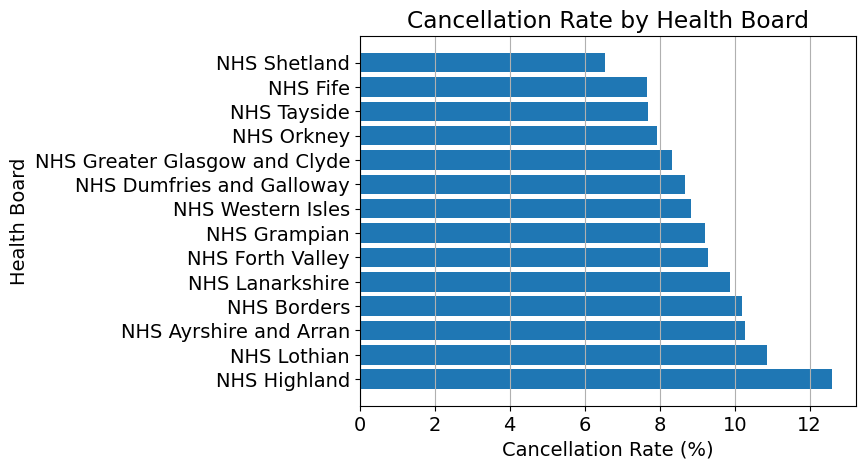

In [120]:
#plot cancellation percentage by board

plt.barh(totals_by_board['HBName'], totals_by_board['CancellationRate'])
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Health Board')
plt.title('Cancellation Rate by Health Board')
plt.grid(axis='x')
plt.show()



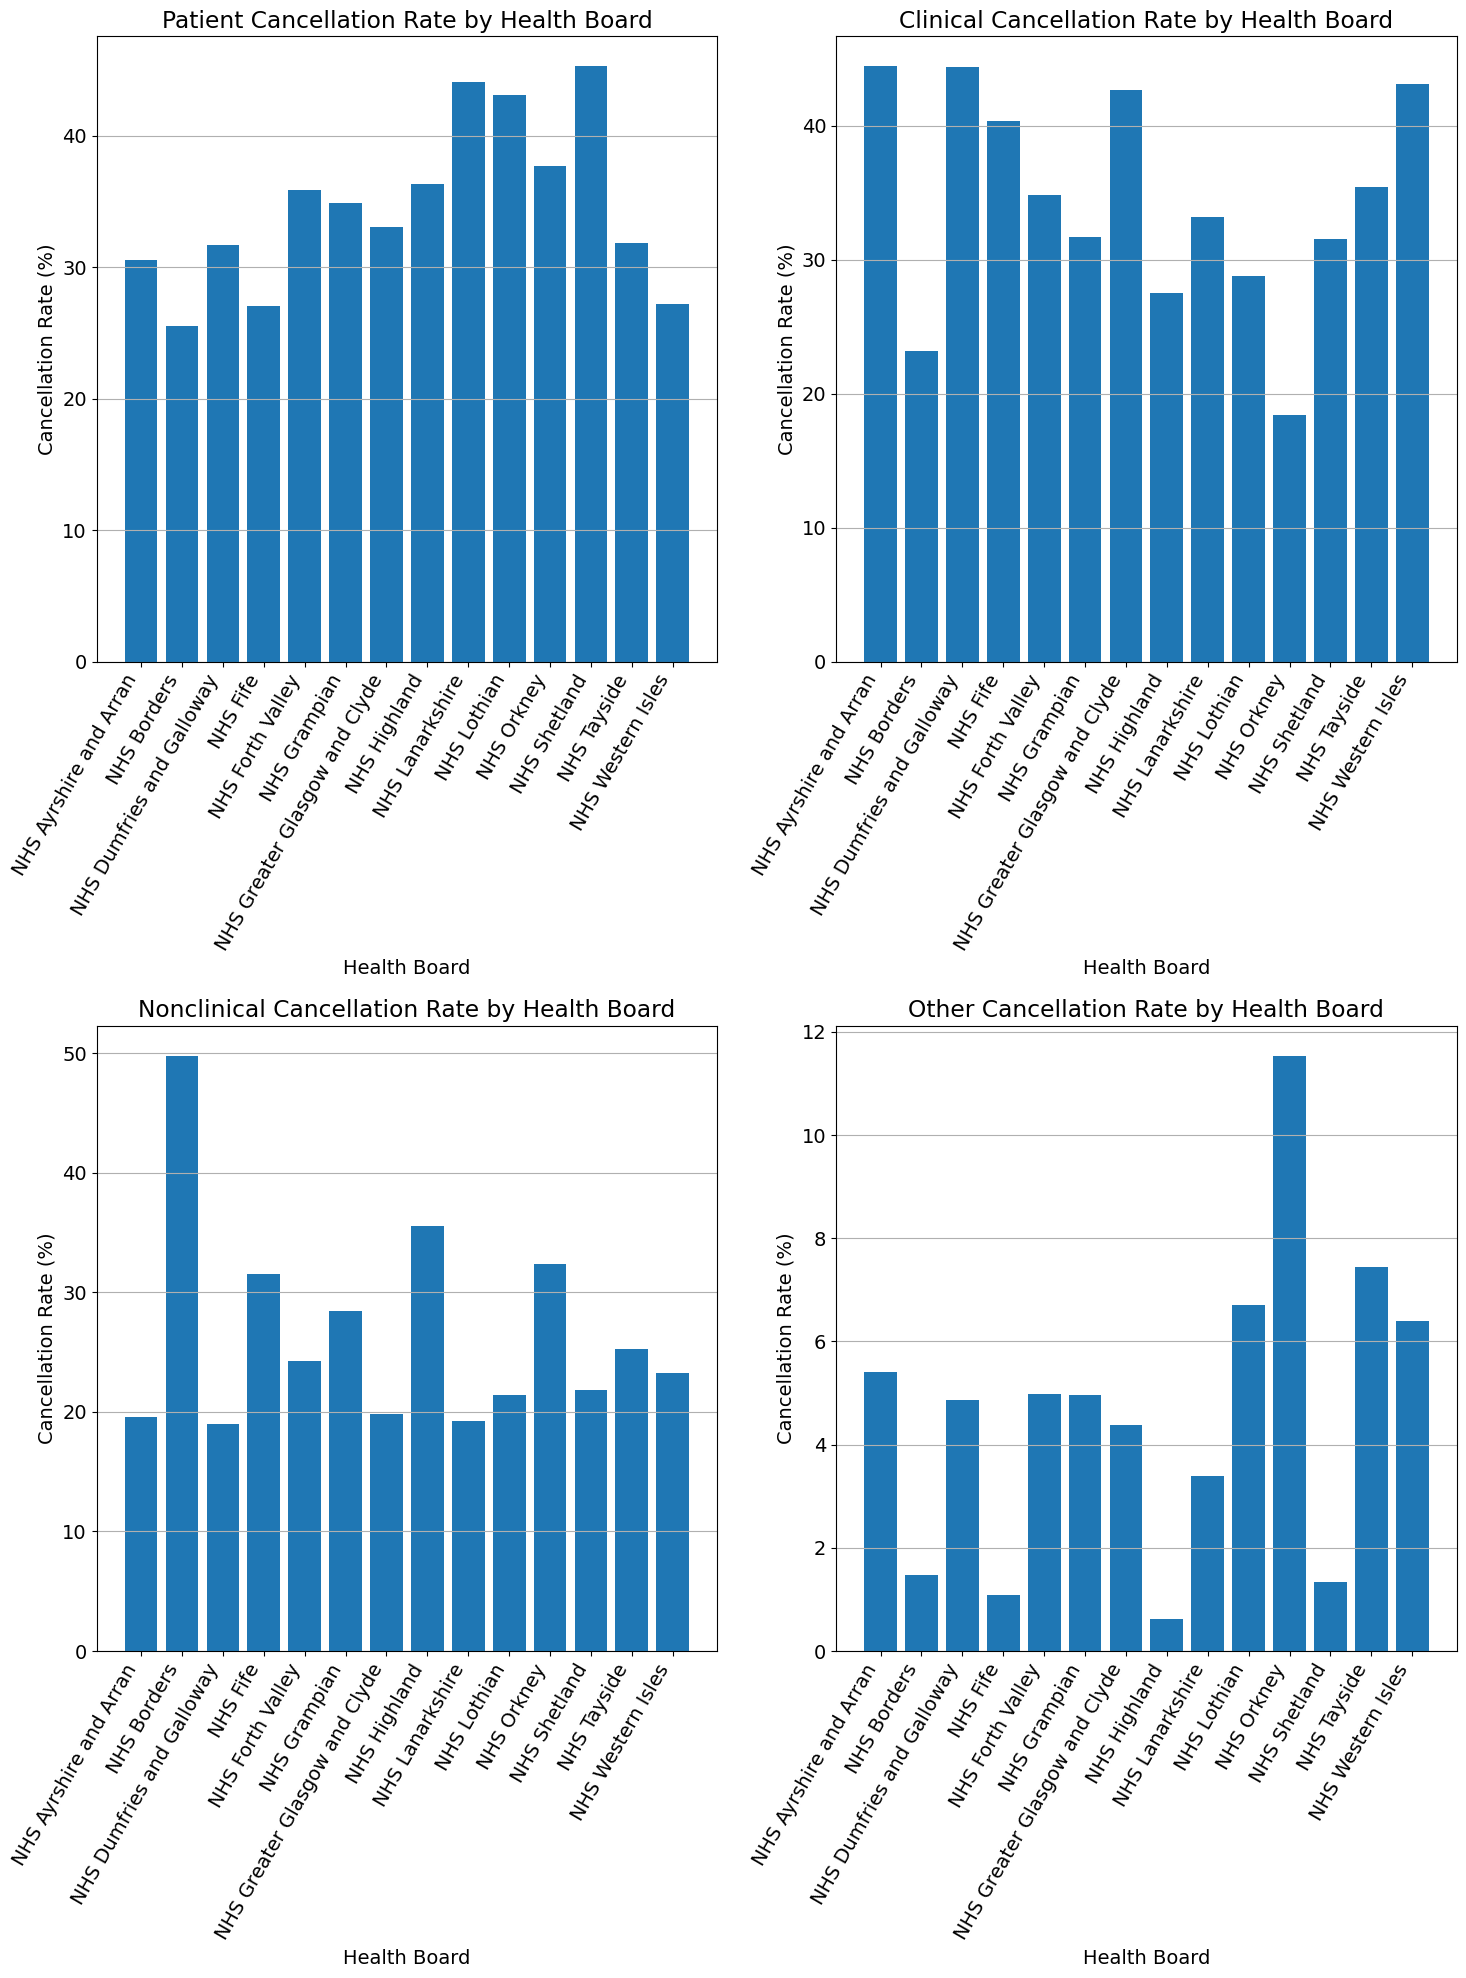

In [121]:
totals_by_board = totals_by_board.sort_values('HBName')
rot =60
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(2, 2, figsize=(15, 20))

axs[0, 0].bar(totals_by_board['HBName'], totals_by_board['PatientCancellationRate'])
axs[0, 0].set_ylabel('Cancellation Rate (%)')
axs[0, 0].set_xlabel('Health Board')
axs[0, 0].grid(axis='y')
axs[0, 0].set_title('Patient Cancellation Rate by Health Board')
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=rot, ha="right")

axs[0, 1].bar(totals_by_board['HBName'], totals_by_board['ClinicalCancellationRate'])
axs[0, 1].set_ylabel('Cancellation Rate (%)')
axs[0, 1].set_xlabel('Health Board')
axs[0, 1].grid(axis='y')
axs[0, 1].set_title('Clinical Cancellation Rate by Health Board')
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=rot, ha="right")

axs[1, 0].bar(totals_by_board['HBName'], totals_by_board['NonClinicalCancellationRate'])
axs[1, 0].set_ylabel('Cancellation Rate (%)')
axs[1, 0].set_xlabel('Health Board')
axs[1, 0].grid(axis='y')
axs[1, 0].set_title('Nonclinical Cancellation Rate by Health Board')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=rot, ha="right")

axs[1, 1].bar(totals_by_board['HBName'], totals_by_board['OtherCancellationRate'])
axs[1, 1].set_ylabel('Cancellation Rate (%)')
axs[1, 1].set_xlabel('Health Board')
axs[1, 1].grid(axis='y')
axs[1, 1].set_title('Other Cancellation Rate by Health Board')
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=rot, ha="right")

plt.subplots_adjust(wspace=0.5, hspace=0.8)

#save plot



plt.tight_layout()
plt.savefig('cancellation_rate_by_board.png')

plt.show()

In [122]:
print(totals_by_board.describe())



       TotalCancelled  TotalOperations  CancelledByPatientReason  \
count           14.00            14.00                     14.00   
mean         15957.14        170899.29                   5767.07   
std          15374.60        164241.33                   6073.71   
min            922.00         10445.00                    251.00   
25%           4863.00         49800.50                   1328.00   
50%          13167.50        135827.00                   4281.00   
75%          18879.25        198504.00                   7572.50   
max          48812.00        573835.00                  21047.00   

       ClinicalReason  NonClinicalCapacityReason  OtherReason  \
count           14.00                      14.00        14.00   
mean          5654.29                    3766.50       769.07   
std           5641.35                    3190.28       928.82   
min            353.00                     214.00        15.00   
25%           1391.00                    1845.75        91.25 

In [123]:
#get month and year

data['Month'] = data['Month'].astype(str)
data['Year'] = data['Month'].str[:4]


In [124]:
#determine if during covid period

data['CovidPeriod'] = data['Month'].apply(lambda x: 1 if x >= '202003' and x <= "202204" else 0)

data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod
date,,,,,,,,,,
2015-05-01,201505,S92000003,28810,2695,1057,853,523,262,2015,0
2015-06-01,201506,S92000003,30941,2800,1194,870,449,287,2015,0
2015-07-01,201507,S92000003,27725,2642,1083,854,457,248,2015,0
2015-08-01,201508,S92000003,28948,2630,1080,912,491,147,2015,0
2015-09-01,201509,S92000003,30938,2829,1122,1000,535,172,2015,0


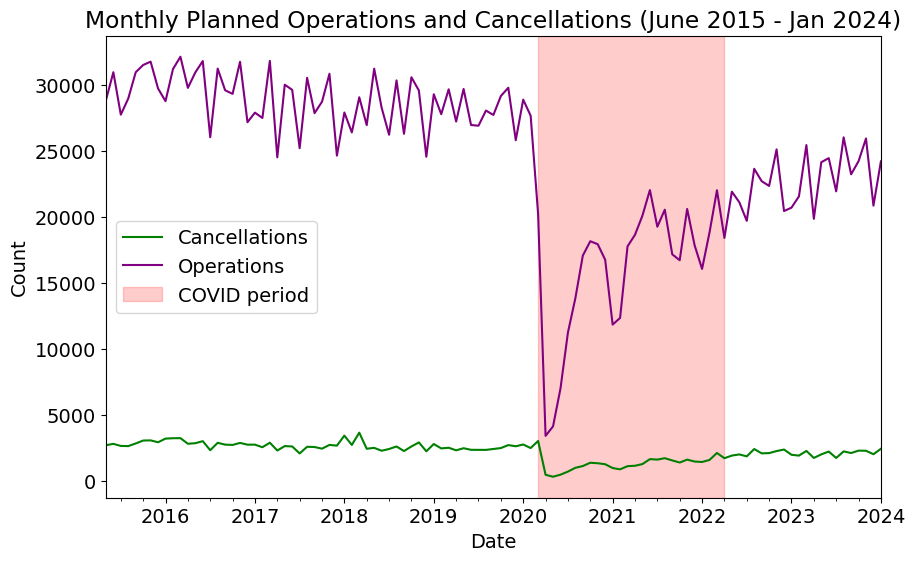

In [125]:
#plot monthly operations and cancellations

data['date'] = pd.to_datetime(data['Month'], format='%Y%m')
data.set_index('date')

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})


plt.rcParams.update({'font.size': 14})

data.set_index('date')['TotalCancelled'].plot(label='Cancellations',color='green')


data.set_index('date')['TotalOperations'].plot(label='Operations', color='purple')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-04-01'), color='red', alpha=0.2, label='COVID period')

plt.title('Monthly Planned Operations and Cancellations (June 2015 - Jan 2024)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()


plt.savefig('operations_cancellations.png')

plt.show()

In [126]:
print(data.columns)

#make index date



Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'Year', 'CovidPeriod',
       'date'],
      dtype='object')


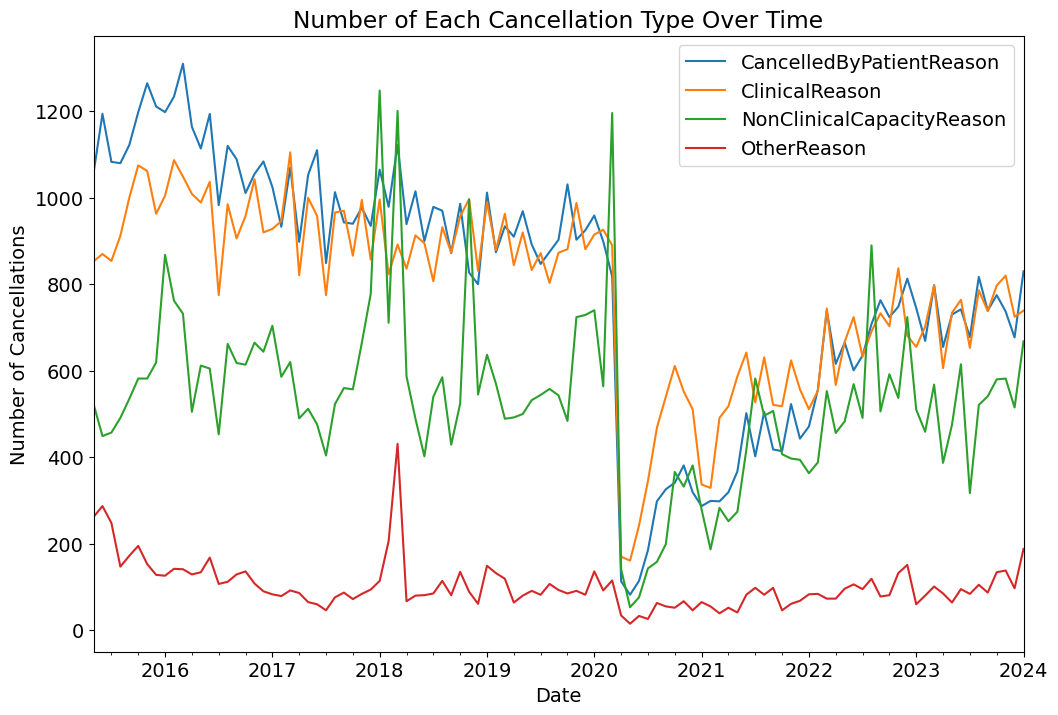

In [127]:
#plot cancellations by reason over time

columns_to_plot = ['CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']
data_to_plot = data[columns_to_plot]


data_to_plot.plot(figsize=(12,8))

plt.title('Number of Each Cancellation Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.show()

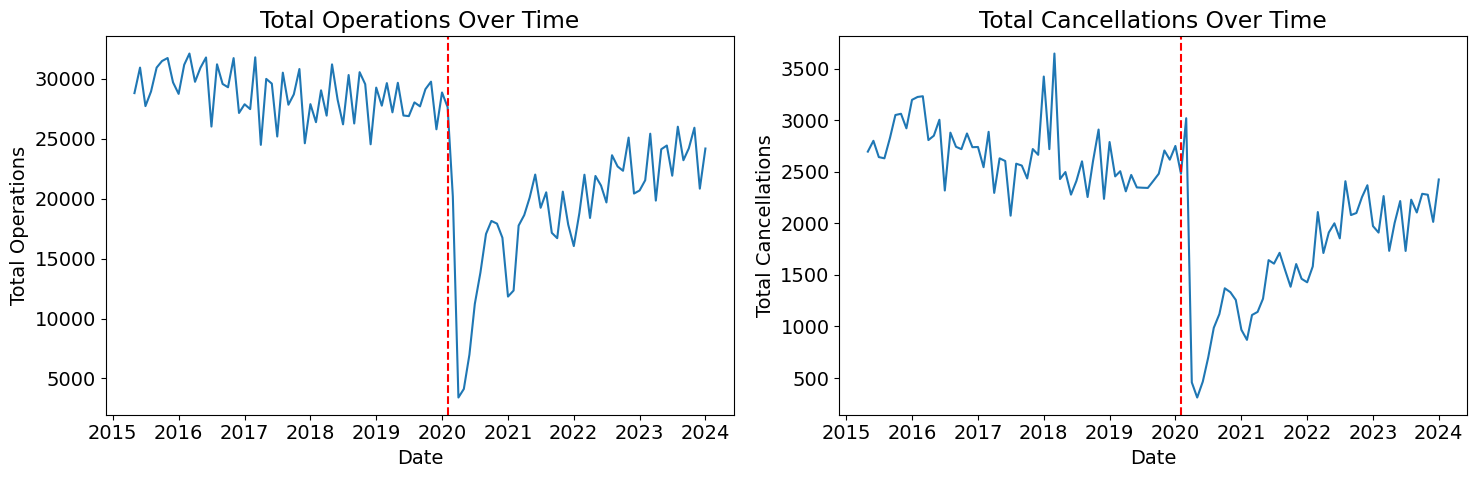

In [128]:

#plot total operations and cancellations over time

data.index = pd.to_datetime(data.index)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].plot(data.index, data['TotalOperations'])
axs[0].set_title('Total Operations Over Time')
axs[0].set_xlabel('Date')
axs[0].axvline(pd.Timestamp('2020-02-01'), color='r', linestyle='--', label='Start of COVID-19')
axs[0].set_ylabel('Total Operations')


axs[1].plot(data.index, data['TotalCancelled'])
axs[1].set_title('Total Cancellations Over Time')
axs[1].axvline(pd.Timestamp('2020-02-01'), color='r', linestyle='--', label='Start of COVID-19')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Total Cancellations')

plt.tight_layout()
plt.show()

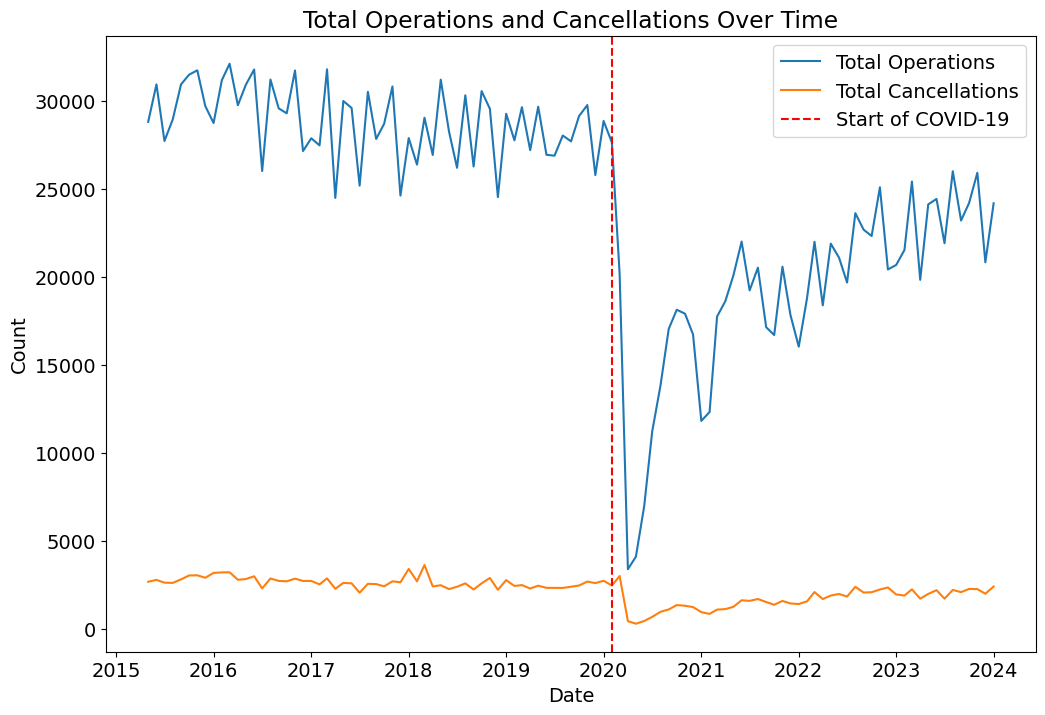

In [129]:


plt.figure(figsize=(12,8))


plt.plot(data.index, data['TotalOperations'], label='Total Operations')


plt.plot(data.index, data['TotalCancelled'], label='Total Cancellations')

plt.axvline(pd.Timestamp('2020-02-01'), color='r', linestyle='--', label='Start of COVID-19')

plt.title('Total Operations and Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

In [130]:
#calculate cancellation rate by month

data['CancellationRate'] = data['TotalCancelled'] / data['TotalOperations']*100
print(data.head())



             Month    Country  TotalOperations  TotalCancelled  \
date                                                             
2015-05-01  201505  S92000003            28810            2695   
2015-06-01  201506  S92000003            30941            2800   
2015-07-01  201507  S92000003            27725            2642   
2015-08-01  201508  S92000003            28948            2630   
2015-09-01  201509  S92000003            30938            2829   

            CancelledByPatientReason  ClinicalReason  \
date                                                   
2015-05-01                      1057             853   
2015-06-01                      1194             870   
2015-07-01                      1083             854   
2015-08-01                      1080             912   
2015-09-01                      1122            1000   

            NonClinicalCapacityReason  OtherReason  Year  CovidPeriod  \
date                                                                   

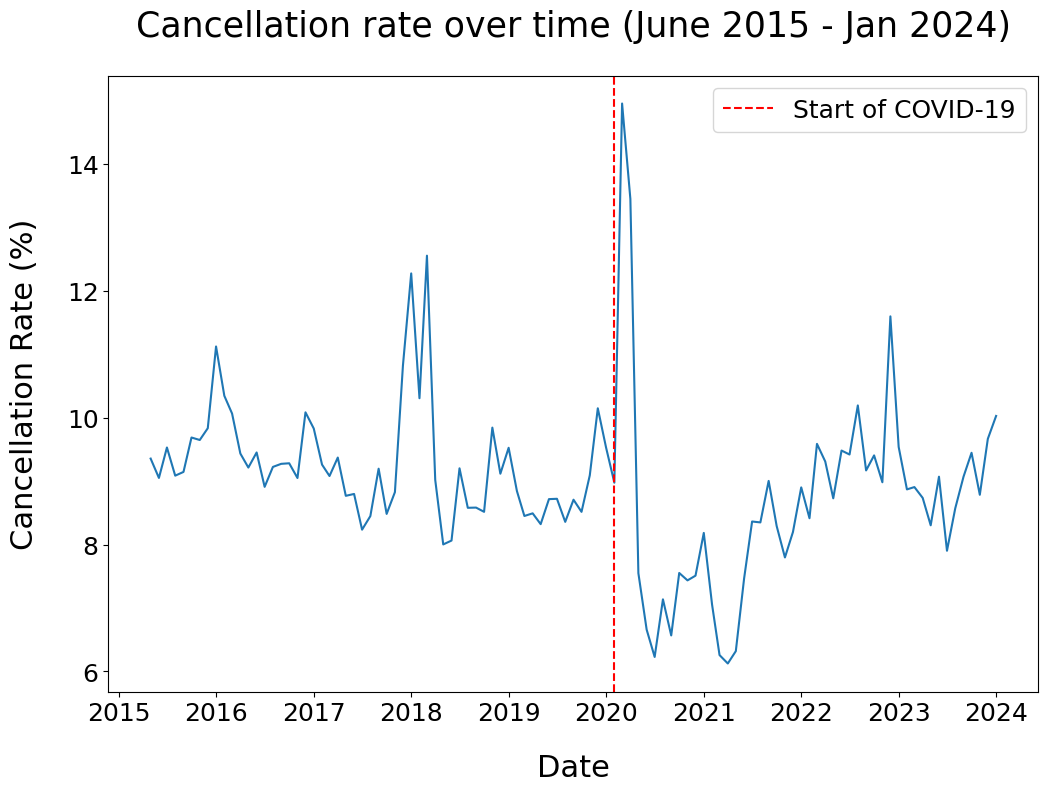

In [131]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['CancellationRate'])

plt.axvline(pd.Timestamp('2020-02-01'), color='r', linestyle='--', label='Start of COVID-19')

plt.title('Cancellation rate over time (June 2015 - Jan 2024)', fontsize=25, y=1.05)
plt.xlabel('Date', fontsize=22, labelpad=20)
plt.ylabel('Cancellation Rate (%)', fontsize=22, labelpad=20)
plt.legend(fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#save
plt.savefig('cancellation_rate_over_time.png')

plt.show()

In [132]:
cancellations_by_month = data.groupby(data.index)['TotalCancelled'].sum()
cancellations_by_month.head()

date
2015-05-01    2695
2015-06-01    2800
2015-07-01    2642
2015-08-01    2630
2015-09-01    2829
Name: TotalCancelled, dtype: int64

In [133]:
#linear regression

from scipy.stats import linregress

X = np.arange(len(cancellations_by_month))
y = cancellations_by_month.values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

#equation

print(f"y = {slope:.2f}x + {intercept:.2f}")

Slope: -12.81968691685673
Intercept: 2888.2522911051215
R-squared: 0.3350113073914684
P-value: 9.977254085109002e-11
Standard error: 1.7796565775757043
y = -12.82x + 2888.25


In [134]:

#linear regression on differenced data

y_diff = np.diff(y)


X_diff = np.arange(len(y_diff))


slope_diff, intercept_diff, r_value_diff, p_value_diff, std_err_diff = linregress(X_diff, y_diff)

print(f"Slope (differenced): {slope_diff}")
print(f"Intercept (differenced): {intercept_diff}")
print(f"R-squared (differenced): {r_value_diff**2}")
print(f"P-value (differenced): {p_value_diff}")
print(f"Standard error (differenced): {std_err_diff}")


print(f"y (differenced) = {slope_diff:.2f}x + {intercept_diff:.2f}")

Slope (differenced): 0.37905686546463263
Intercept (differenced): -22.117582417582426
R-squared (differenced): 0.0007703766581510912
P-value (differenced): 0.7797183096637248
Standard error (differenced): 1.3517157485708964
y (differenced) = 0.38x + -22.12


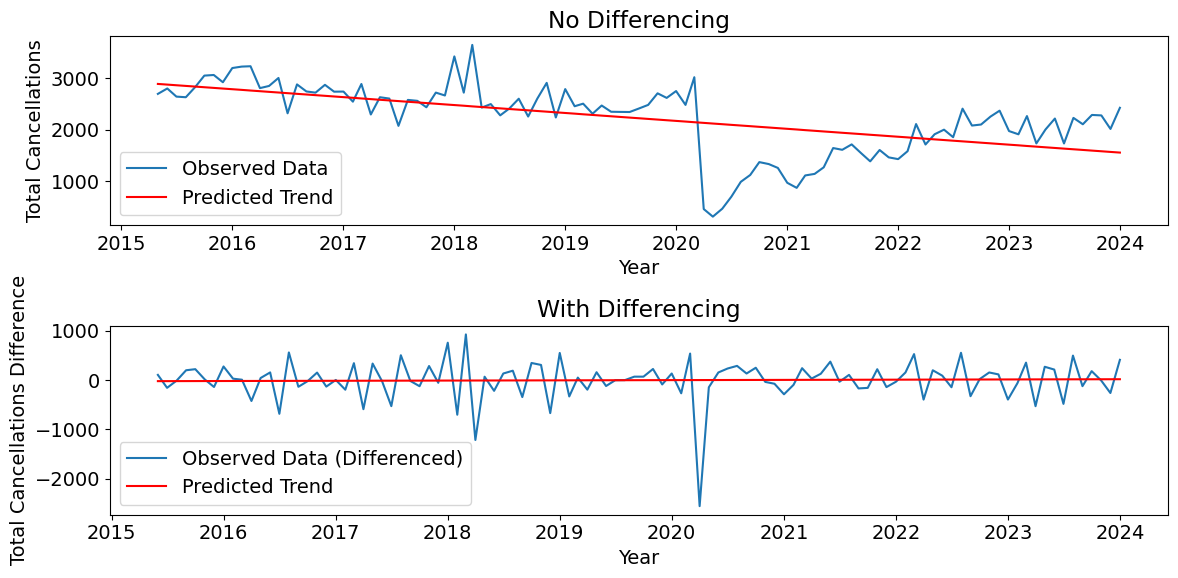

In [135]:
import matplotlib.dates as mdates


#plot

years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(2, 1, figsize=(12, 6))


ax[0].plot(cancellations_by_month.index, y, label='Observed Data')
ax[0].plot(cancellations_by_month.index, intercept + slope*X, color = 'red', label='Predicted Trend')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Cancellations')
ax[0].legend()
ax[0].set_title('No Differencing')
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(years_fmt)


y_diff = np.diff(y)

dates_diff = cancellations_by_month.index[1:]


ax[1].plot(dates_diff, y_diff, label='Observed Data (Differenced)')
ax[1].plot(dates_diff, intercept_diff + slope_diff*X_diff, color = 'red', label='Predicted Trend')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Cancellations Difference')
ax[1].legend()
ax[1].set_title('With Differencing')
ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(years_fmt)

plt.tight_layout()
plt.show()


In [136]:
cancellation_rate_by_month = data.groupby(data.index)['CancellationRate'].sum()
cancellation_rate_by_month.head()

date
2015-05-01   9.35
2015-06-01   9.05
2015-07-01   9.53
2015-08-01   9.09
2015-09-01   9.14
Name: CancellationRate, dtype: float64

In [137]:

X = np.arange(len(cancellation_rate_by_month))
y = cancellation_rate_by_month.values


slope, intercept, r_value, p_value, std_err = linregress(X, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

#equation

print(f"y = {slope:.2f}x + {intercept:.2f}")

results = {
    'Slope': [slope],
    'Intercept': [intercept],
    'R-squared': [r_value**2],
    'P-value': [p_value],
    'Standard error': [std_err]
}

results_df = pd.DataFrame(results)

print(results_df)


Slope: -0.008737589450454646
Intercept: 9.452531289450928
R-squared: 0.040373822953573134
P-value: 0.039849132661326
Standard error: 0.004197339791546596
y = -0.01x + 9.45
   Slope  Intercept  R-squared  P-value  Standard error
0  -0.01       9.45       0.04     0.04            0.00


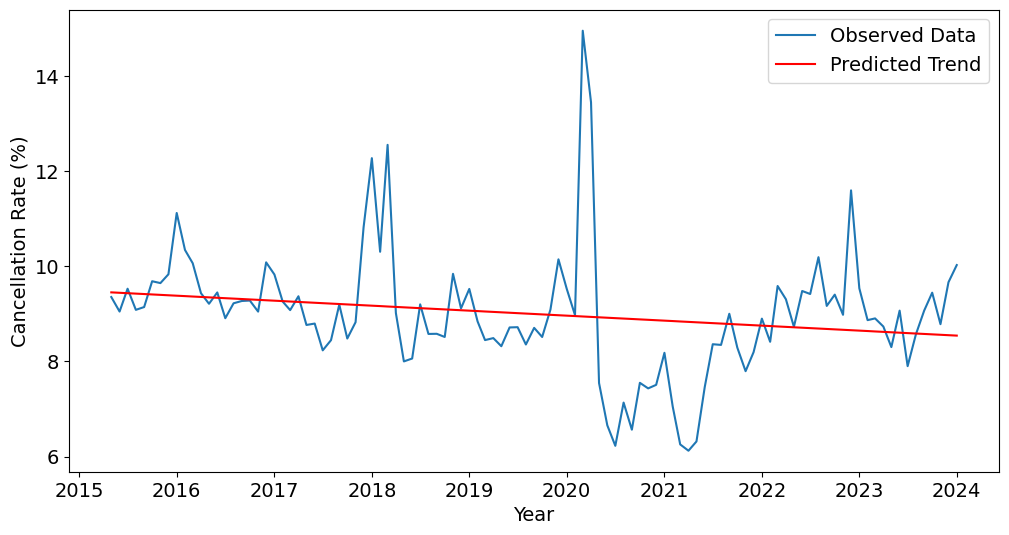

In [138]:




years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(cancellation_rate_by_month.index, y, label='Observed Data')
ax.plot(cancellation_rate_by_month.index, intercept + slope*X, color = 'red', label='Predicted Trend')

ax.set_xlabel('Year')
ax.set_ylabel('Cancellation Rate (%)')
ax.legend()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.show()

In [139]:
max_value = data['CancellationRate'].max()
print("Maximum Cancellation Rate:", max_value)

smallest_values = data['CancellationRate'].nsmallest(5)
print("5 Smallest Cancellation Rates:\n", smallest_values)

Maximum Cancellation Rate: 14.951465927099841
5 Smallest Cancellation Rates:
 date
2021-04-01   6.12
2020-07-01   6.23
2021-03-01   6.26
2021-05-01   6.32
2020-09-01   6.57
Name: CancellationRate, dtype: float64


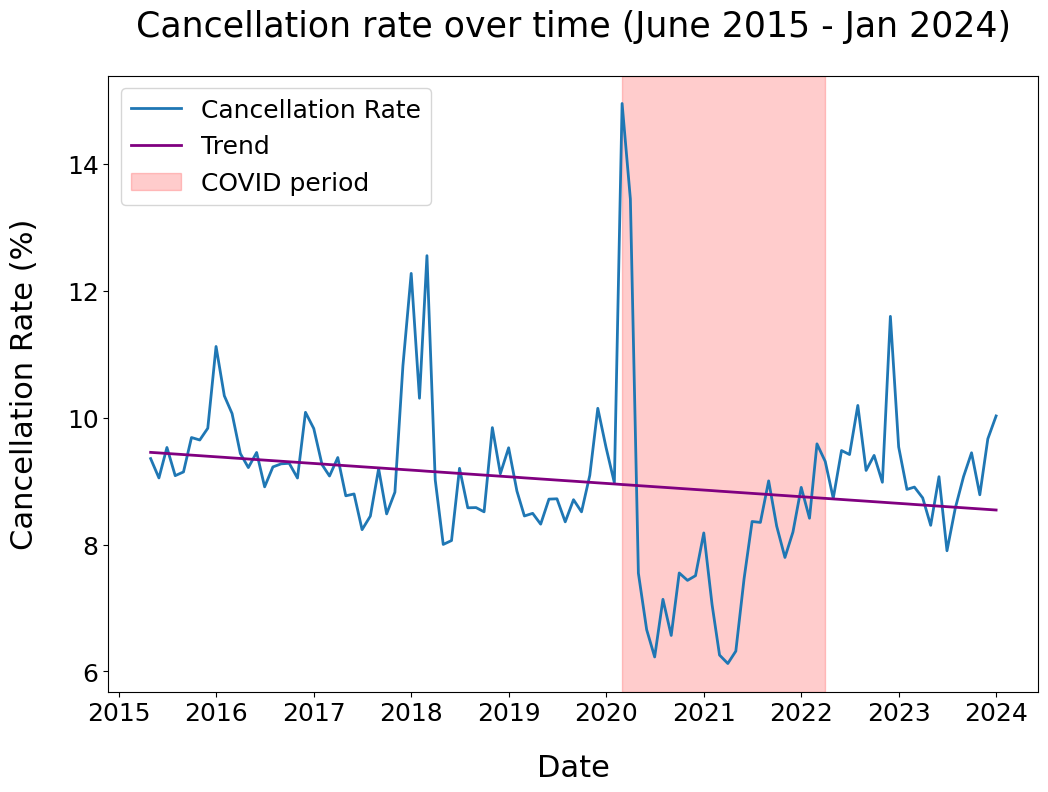

In [140]:
plt.figure(figsize=(12,8))


plt.plot(data.index, y, label='Cancellation Rate', linewidth=2)


plt.plot(data.index, intercept + slope*X, color='purple', label='Trend', linewidth=2)

plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-04-01'), color='red', alpha=0.2, label='COVID period')
#plt.axvline(pd.Timestamp('2020-02-01'), color='r', linestyle='--', label='Start of COVID-19', linewidth=2)

plt.title('Cancellation rate over time (June 2015 - Jan 2024)', fontsize=25, y=1.05)
plt.xlabel('Date', fontsize=22, labelpad=20)
plt.ylabel('Cancellation Rate (%)', fontsize=22, labelpad=20)
plt.legend(fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Save the figure
plt.savefig('cancellation_rate_over_time.png')

plt.show()

In [141]:
data['date'] = pd.to_datetime(data['Month'], format='%Y%m')
data.set_index('date', inplace=True)
data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod,CancellationRate
date,,,,,,,,,,,
2015-05-01,201505,S92000003,28810,2695,1057,853,523,262,2015,0,9.35
2015-06-01,201506,S92000003,30941,2800,1194,870,449,287,2015,0,9.05
2015-07-01,201507,S92000003,27725,2642,1083,854,457,248,2015,0,9.53
2015-08-01,201508,S92000003,28948,2630,1080,912,491,147,2015,0,9.09
2015-09-01,201509,S92000003,30938,2829,1122,1000,535,172,2015,0,9.14


In [142]:

#define covid period

start_covid = pd.Timestamp('2020-03-01')
end_covid = pd.Timestamp('2022-04-01')
before_covid = data.loc[data.index < start_covid, 'CancellationRate']
after_covid = data.loc[data.index > end_covid, 'CancellationRate']

print(before_covid.size)
print(after_covid.size)


58
21


In [143]:
t_test_result = stats.ttest_ind(before_covid, after_covid)

print("T-test result:", t_test_result)

T-test result: TtestResult(statistic=0.23098761940275214, pvalue=0.8179370840757363, df=77.0)


In [144]:
data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod,CancellationRate
date,,,,,,,,,,,
2015-05-01,201505,S92000003,28810,2695,1057,853,523,262,2015,0,9.35
2015-06-01,201506,S92000003,30941,2800,1194,870,449,287,2015,0,9.05
2015-07-01,201507,S92000003,27725,2642,1083,854,457,248,2015,0,9.53
2015-08-01,201508,S92000003,28948,2630,1080,912,491,147,2015,0,9.09
2015-09-01,201509,S92000003,30938,2829,1122,1000,535,172,2015,0,9.14


In [145]:
#totals over 9 years

totals_by_year = data.groupby('Year')[['TotalCancelled', 'TotalOperations', 'CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']].sum()
totals_by_year.head()



,TotalCancelled,TotalOperations,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
Year,,,,,,
2015,22629,240294,9210,7589,4238,1592
2016,34581,359487,13556,11763,7740,1522
2017,30731,338933,11746,11187,6874,924
2018,32007,337162,11454,10752,8257,1544
2019,29779,337820,11075,10727,6802,1175


In [146]:
summary = totals_by_year.describe()
print(summary)

       TotalCancelled  TotalOperations  CancelledByPatientReason  \
count           10.00            10.00                     10.00   
mean         23327.10        256891.20                   8428.40   
std           9645.02        101072.50                   3920.21   
min           2425.00         24186.00                    830.00   
25%          17898.00        221092.50                   5636.00   
50%          24274.50        265109.50                   8986.00   
75%          30493.00        337655.50                  11359.25   
max          34581.00        359487.00                  13556.00   

       ClinicalReason  NonClinicalCapacityReason  OtherReason  
count           10.00                      10.00        10.00  
mean          8219.20                    5602.50      1076.70  
std           3301.19                    2232.20       436.92  
min            739.00                     668.00       188.00  
25%           6645.50                    4380.50       821.25  
50%

In [147]:
#overall totals

totals = totals_by_year.sum()

totals['CancellationRate'] = totals['TotalCancelled'] / totals['TotalOperations']
totals['CancellationRate'] = totals['CancellationRate'] * 100

totals['PatientCancellationRate'] = totals['CancelledByPatientReason'] / totals['TotalCancelled']
totals['PatientCancellationRate'] = totals['PatientCancellationRate'] * 100

totals['ClinicalCancellationRate'] = totals['ClinicalReason'] / totals['TotalCancelled']
totals['ClinicalCancellationRate'] = totals['ClinicalCancellationRate'] * 100

totals['NonClinicalCancellationRate'] = totals['NonClinicalCapacityReason'] / totals['TotalCancelled']
totals['NonClinicalCancellationRate'] = totals['NonClinicalCancellationRate'] * 100

totals['OtherCancellationRate'] = totals['OtherReason'] / totals['TotalCancelled']
totals['OtherCancellationRate'] = totals['OtherCancellationRate'] * 100

totals.head()


TotalCancelled               233271.00
TotalOperations             2568912.00
CancelledByPatientReason      84284.00
ClinicalReason                82192.00
NonClinicalCapacityReason     56025.00
dtype: float64

In [148]:
print(totals)

TotalCancelled                 233271.00
TotalOperations               2568912.00
CancelledByPatientReason        84284.00
ClinicalReason                  82192.00
NonClinicalCapacityReason       56025.00
OtherReason                     10767.00
CancellationRate                    9.08
PatientCancellationRate            36.13
ClinicalCancellationRate           35.23
NonClinicalCancellationRate        24.02
OtherCancellationRate               4.62
dtype: float64


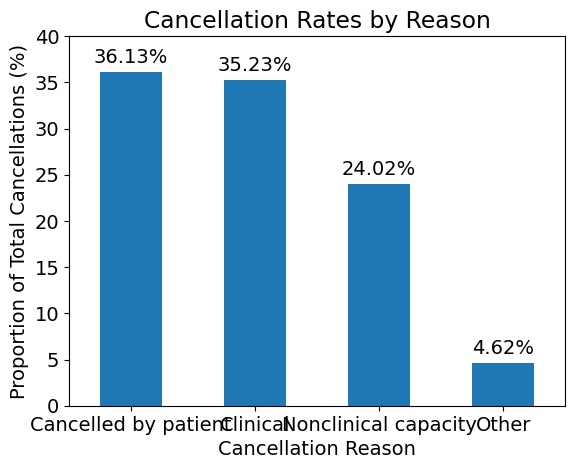

In [149]:
rates = totals[['PatientCancellationRate', 'ClinicalCancellationRate', 'NonClinicalCancellationRate', 'OtherCancellationRate']]
names = ['Cancelled by patient', 'Clinical', 'Nonclinical capacity', 'Other']

rates.index = names

ax = rates.plot(kind='bar', stacked=True)

plt.xlabel('Cancellation Reason')
plt.ylabel('Proportion of Total Cancellations (%)')
plt.xticks(rotation=0)
plt.title('Cancellation Rates by Reason')
plt.ylim(0, 40)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height+1, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center')


plt.savefig('cancellation_reasons.png')

plt.show()


In [150]:
print(rates)

Cancelled by patient   36.13
Clinical               35.23
Nonclinical capacity   24.02
Other                   4.62
dtype: float64


In [151]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(totals)



TotalCancelled                 233271.00
TotalOperations               2568912.00
CancelledByPatientReason        84284.00
ClinicalReason                  82192.00
NonClinicalCapacityReason       56025.00
OtherReason                     10767.00
CancellationRate                    9.08
PatientCancellationRate            36.13
ClinicalCancellationRate           35.23
NonClinicalCancellationRate        24.02
OtherCancellationRate               4.62
dtype: float64
